# Breast Cancer Notebook

This notebook documents preprocessing steps, classification, and evaluation for the provided breast-cancer dataset. It contains step-by-step code cells for each major stage: loading, inspection, cleaning, outlier handling, encoding, feature engineering, correlation analysis, scaling, and splitting. 

// TODO

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA 

## Load dataset

This *Breast Cancer* dataset can be used to predict if a patient has a "reurrence-events" or "no-recurrence-events", i.e. give a malignant or benign diagnosis.

It includes
- **breast-cancer-diagnostic.shuf.lrn.csv**: training dataset
- **breast-cancer-diagnostic.shuf.tes.csv**: test/validation dataset 
- **breast-cancer-diagnostic.shuf.sol.ex.csv**: sample solutions

In [228]:
datafolder = "../../datasets/BreastCancer"

training_file = datafolder + "/breast-cancer-diagnostic.shuf.lrn.csv"
validation_file = datafolder + "/breast-cancer-diagnostic.shuf.tes.csv"
sample_solution_file = datafolder + "/breast-cancer-diagnostic.shuf.sol.ex.csv"

training_df = pd.read_csv(training_file)
validation_df = pd.read_csv(validation_file)

print("training df shape:", training_df.shape)   
training_df.head()

training df shape: (285, 32)


,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,8813129,False,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.024560,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.17860,0.09678,0.2506,0.07623
1,898678,False,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,...,13.64,27.06,86.54,562.6,0.1289,0.1352,0.04506,0.05093,0.2880,0.08083
2,917896,False,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.037830,...,15.11,25.63,99.43,701.9,0.1425,0.2566,0.19350,0.12840,0.2849,0.09031
3,869691,True,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.074150,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300
4,9110127,True,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.062540,...,20.38,22.02,133.30,1292.0,0.1263,0.2666,0.42900,0.15350,0.2842,0.08225


## Inspect dataset

In [ ]:
print(f"""
The training dataset has following properties:
    - Number of Instances: {training_df.shape[0]}
    - Number of Features: {training_df.shape[1]-1}
    - Number of Target Attributes: 1
    - Has missing values: {'yes' if training_df.isnull().sum().sum() > 0 else 'no'}
    - Types of attributes: {training_df.dtypes.value_counts().to_dict()}
    - Duplicate Instances: {training_df.duplicated().sum()}
""")
display(training_df.describe().T)

print(f"""
The validation dataset has following properties:
    - Number of Instances: {validation_df.shape[0]}
    - Has missing values: {'yes' if validation_df.isnull().sum().sum() > 0 else 'no'}
    - Duplicate Instances: {validation_df.duplicated().sum()}
""")




The training dataset has following properties:
    - Number of Instances: 285
    - Number of Features: 31
    - Number of Target Attributes: 1
    - Number of Dimensions: 2
    - Has missing values: no
    - Types of attributes: {dtype('float64'): 30, dtype('int64'): 1, dtype('bool'): 1}
    - Duplicate Instances: 0



,count,mean,std,min,25%,50%,75%,max
ID,285.0,2.861498e+07,1.204247e+08,8670.000000,871149.000000,906539.000000,8.811523e+06,9.113205e+08
radiusMean,285.0,1.406867e+01,3.486377e+00,6.981000,11.690000,13.280000,1.607000e+01,2.742000e+01
textureMean,285.0,1.911621e+01,4.516754e+00,10.380000,15.900000,18.700000,2.184000e+01,3.928000e+01
perimeterMean,285.0,9.155505e+01,2.402869e+01,43.790000,74.680000,86.100000,1.058000e+02,1.869000e+02
areaMean,285.0,6.496179e+02,3.439793e+02,143.500000,418.700000,546.400000,7.978000e+02,2.501000e+03
smoothnessMean,285.0,9.585119e-02,1.389354e-02,0.052630,0.086000,0.095140,1.051000e-01,1.634000e-01
compactnessMean,285.0,1.026052e-01,5.142201e-02,0.019380,0.062190,0.092280,1.304000e-01,3.454000e-01
concavityMean,285.0,8.558703e-02,7.571744e-02,0.000000,0.026880,0.061950,1.226000e-01,4.108000e-01
concavePointsMean,285.0,4.792968e-02,3.740917e-02,0.000000,0.020690,0.033260,7.340000e-02,1.689000e-01
symmetryMean,285.0,1.829077e-01,2.860628e-02,0.121500,0.162100,0.181400,1.976000e-01,3.040000e-01



The validation dataset has following properties:
    - Number of Instances: 284
    - Has missing values: no
    - Duplicate Instances: 0



### Attributes

In [230]:
print(f"{'Attribute':<25} {'Data Type':<10} {'Missing Values':<15} {'Min':<10} {'Max'}")
print("-" * 70)
for col in training_df.columns:
    print(f"{col:<25} {str(training_df[col].dtype):<10} {training_df[col].isnull().sum():<15} {training_df[col].min():<10} {training_df[col].max()}")

Attribute                 Data Type  Missing Values  Min        Max
----------------------------------------------------------------------
ID                        int64      0               8670       911320501
class                     bool       0               0          True
radiusMean                float64    0               6.981      27.42
 textureMean              float64    0               10.38      39.28
 perimeterMean            float64    0               43.79      186.9
 areaMean                 float64    0               143.5      2501.0
 smoothnessMean           float64    0               0.05263    0.1634
 compactnessMean          float64    0               0.01938    0.3454
 concavityMean            float64    0               0.0        0.4108
 concavePointsMean        float64    0               0.0        0.1689
 symmetryMean             float64    0               0.1215     0.304
 fractalDimensionMean     float64    0               0.05025    0.09502
 radiusStdE

- **ID** (*Integer*): Each record has a unique identifier, which is not a predictive feature but used for reference.
- **class** (*Boolean*): Target attribute indicating whether the tumor is malignant (True) or benign (False).
- All other *numerical* attributes are cell nucleus features, and each measurement (e.g. `radius` or `texture`) appears in three variants:
    - **Mean**: average value across all cells
    - **StdErr**: standard error of the mean (variation of the measurement)
    - **Worst**: largest value observed amoung the cells (indicating extreme abnormality)

#### Strip whitespace from column names

In [ ]:
training_df.rename(columns=lambda x: x.strip(), inplace=True)
validation_df.rename(columns=lambda x: x.strip(), inplace=True)

print('Stripped whitespaces from column names. Columns now:')
training_df.columns.tolist()

Stripped whitespace from column names. Columns now:


['ID',
 'class',
 'radiusMean',
 'textureMean',
 'perimeterMean',
 'areaMean',
 'smoothnessMean',
 'compactnessMean',
 'concavityMean',
 'concavePointsMean',
 'symmetryMean',
 'fractalDimensionMean',
 'radiusStdErr',
 'textureStdErr',
 'perimeterStdErr',
 'areaStdErr',
 'smoothnessStdErr',
 'compactnessStdErr',
 'concavityStdErr',
 'concavePointsStdErr',
 'symmetryStdErr',
 'fractalDimensionStdErr',
 'radiusWorst',
 'textureWorst',
 'perimeterWorst',
 'areaWorst',
 'smoothnessWorst',
 'compactnessWorst',
 'concavityWorst',
 'concavePointsWorst',
 'symmetryWorst',
 'fractalDimensionWorst']

### Visualisations

Text(0.5, 1.0, 'Class Distribution in Training Set')

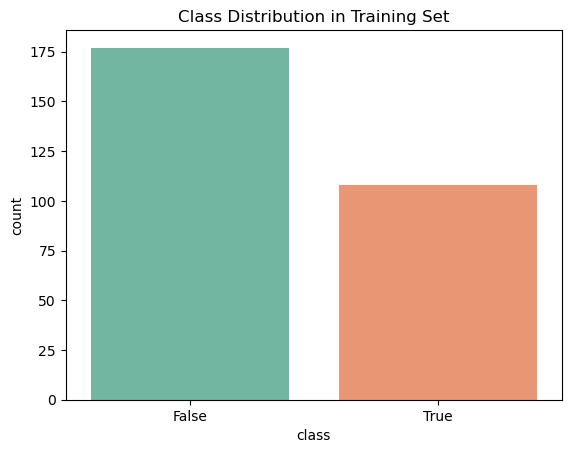

In [232]:
sns.countplot(x='class', data=training_df, palette='Set2')
plt.title('Class Distribution in Training Set')

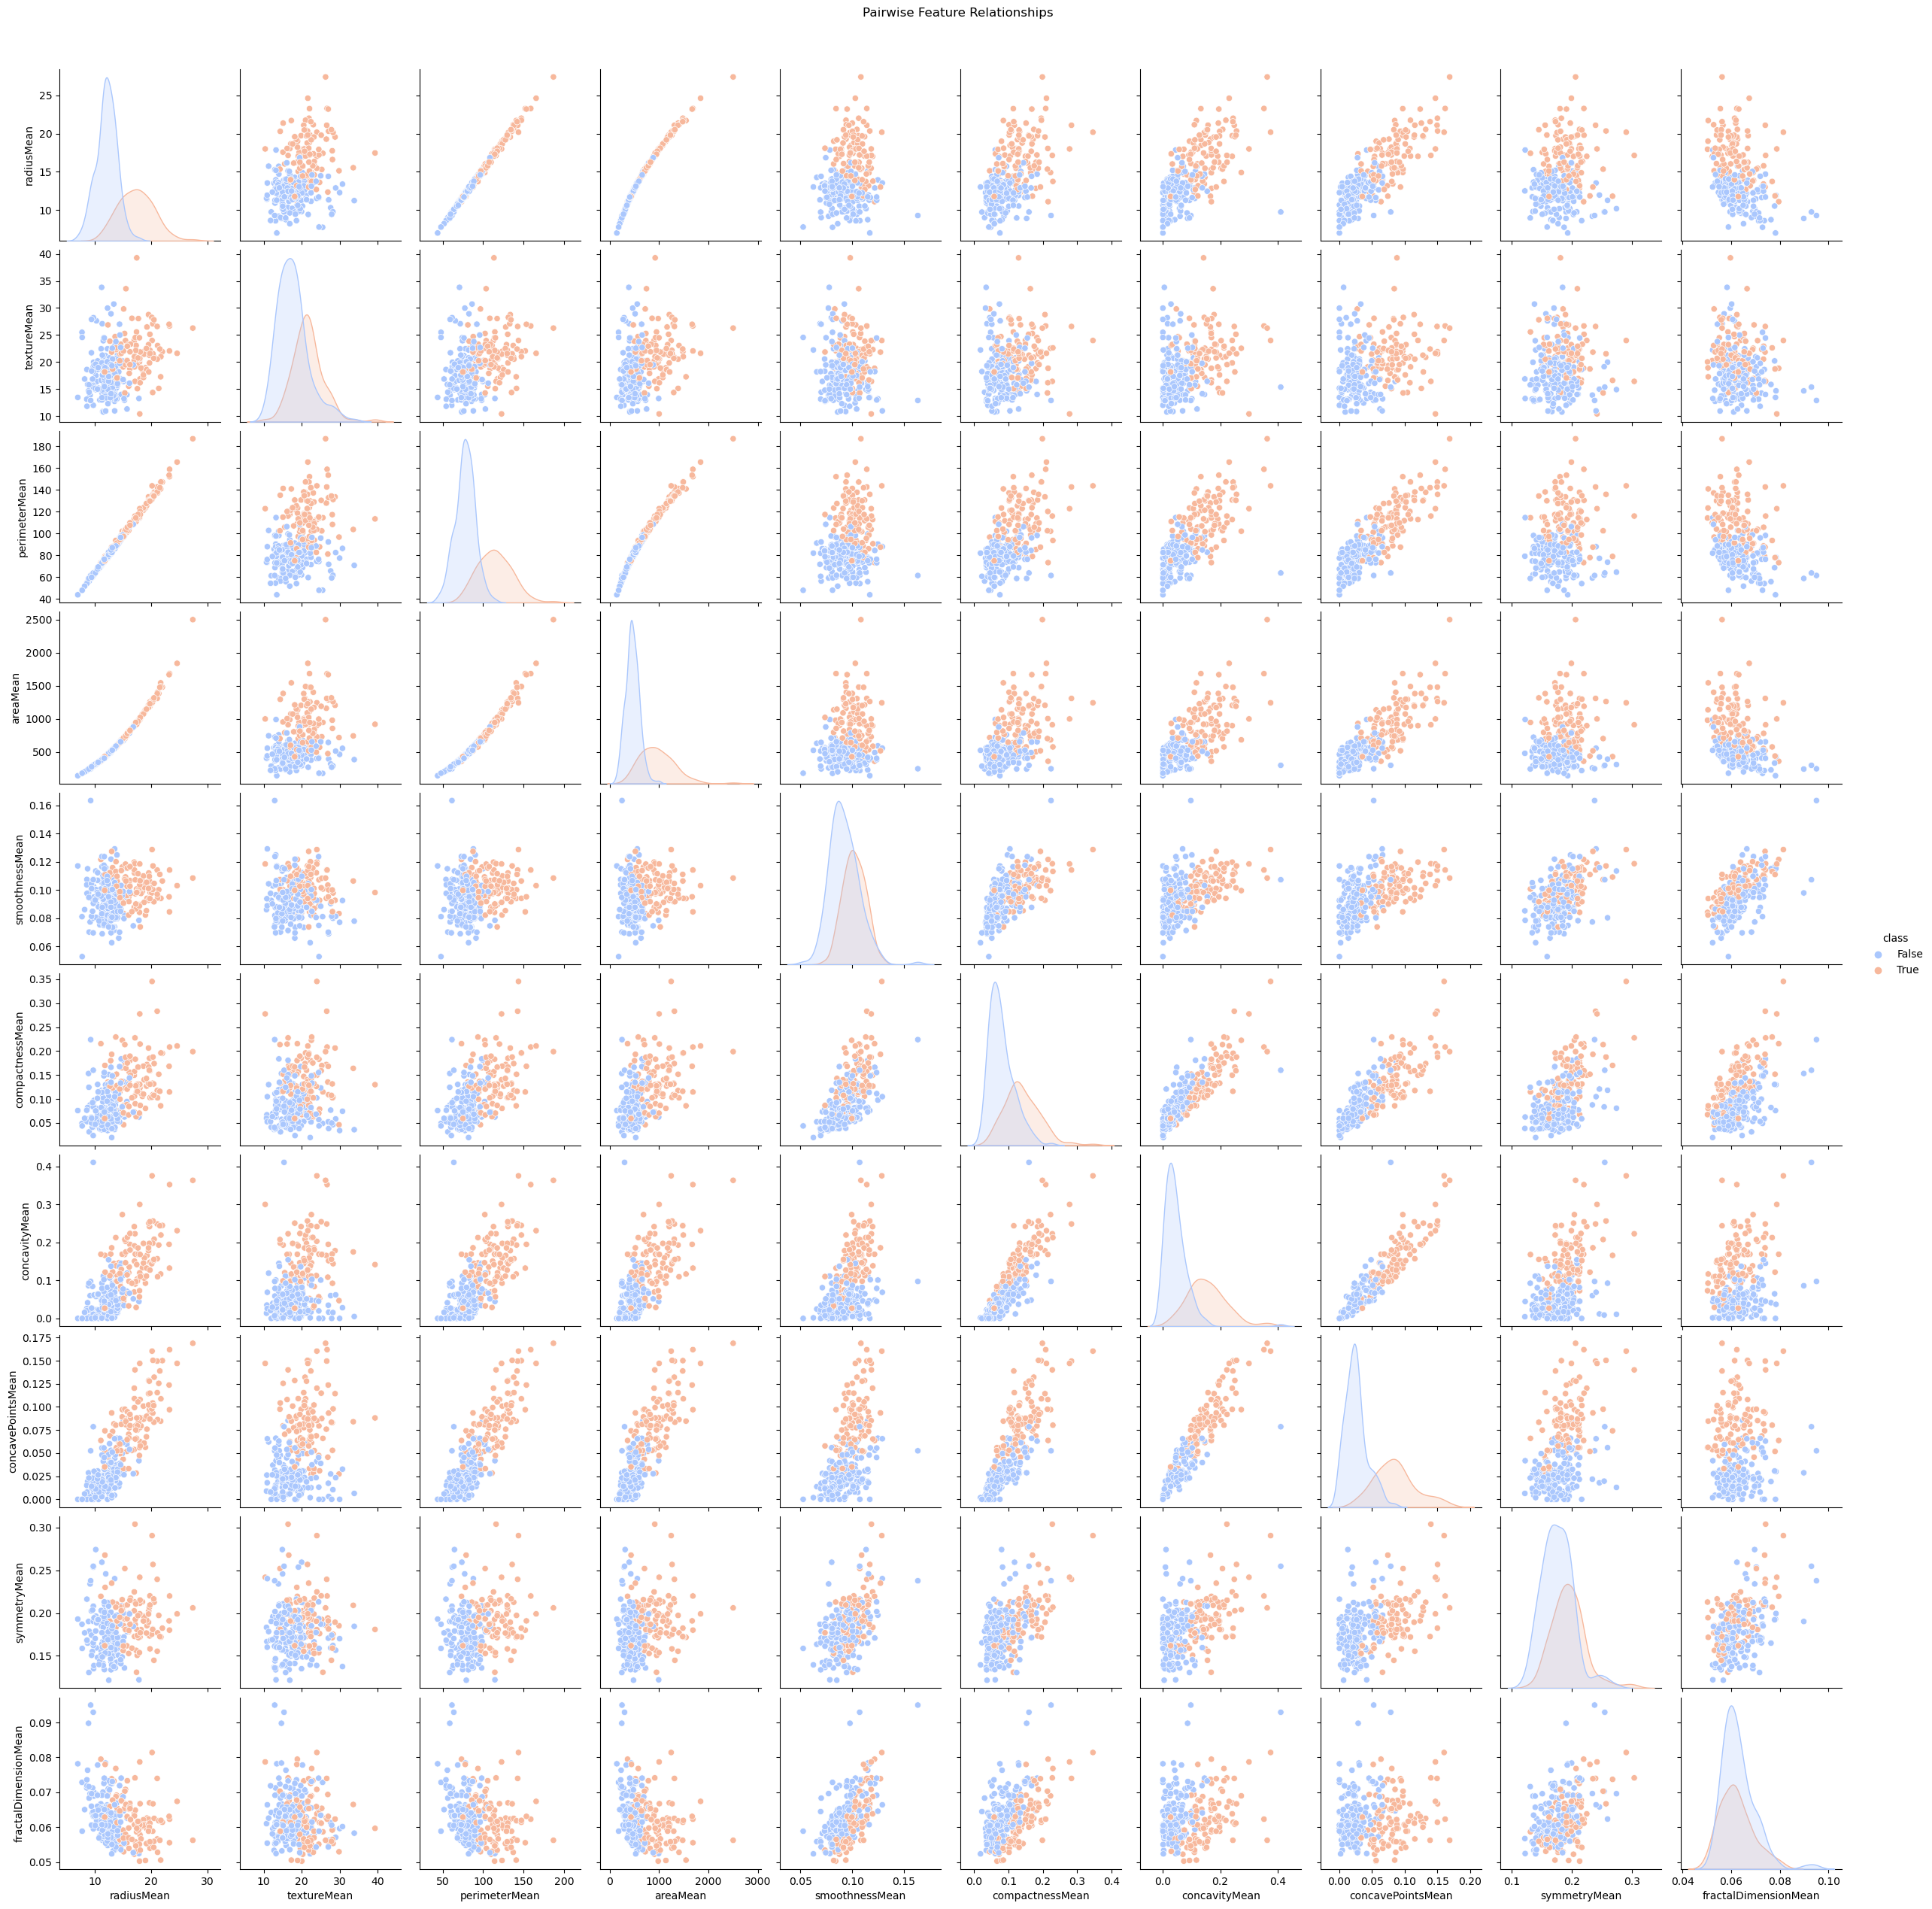

In [233]:
sample_features = ['radiusMean', 'textureMean', 'perimeterMean', 'areaMean', 'smoothnessMean', 'compactnessMean', 'concavityMean', 'concavePointsMean', 'symmetryMean', 'fractalDimensionMean', 'class']
sns.pairplot(training_df[sample_features], hue='class', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

**Observations**

1. High overlap between points of both classes 
    - features alone are not enough to classify tumors reliably
    - e.g. fractalDimensionMean <-> symmetryMean
2. Class separation 
    - features have strong predictive power
    - e.g. concavityMean <-> concavePointsMean
3. Correlations = straight diagonal pattern
    - e.g. radiusMean <-> perimeterMean
4. Outliers

## Preprocessing

We now start preprocessing the data in the training dataset. 

### Identify target and drop non-predictive ID

Target column is `class`. We will drop `ID` because it is non-predictive.

In [234]:
TARGET = 'class'
if TARGET not in training_df.columns:
    raise ValueError(f"Target column '{TARGET}' not found in training dataframe.")

training_df_original = training_df.copy()

if 'ID' in training_df.columns:
    training_df = training_df.drop(columns=['ID'])
print('Shape after dropping ID:', training_df.shape)

Shape after dropping ID: (285, 31)


### Deduplication & missing value handling

- Drop duplicate rows
- Impute missing numeric values with median (fit on training set only later)

In [235]:
shape_before = training_df.shape[0]
training_df = training_df.drop_duplicates()
print('Dropped', shape_before - training_df.shape[0], 'duplicate rows. Now:', training_df.shape)

display(training_df.isnull().sum().loc[lambda s: s>0])

Dropped 0 duplicate rows. Now: (285, 31)


Series([], dtype: int64)

### Outlier detection / visualization

Boxplots to inspect outliers.

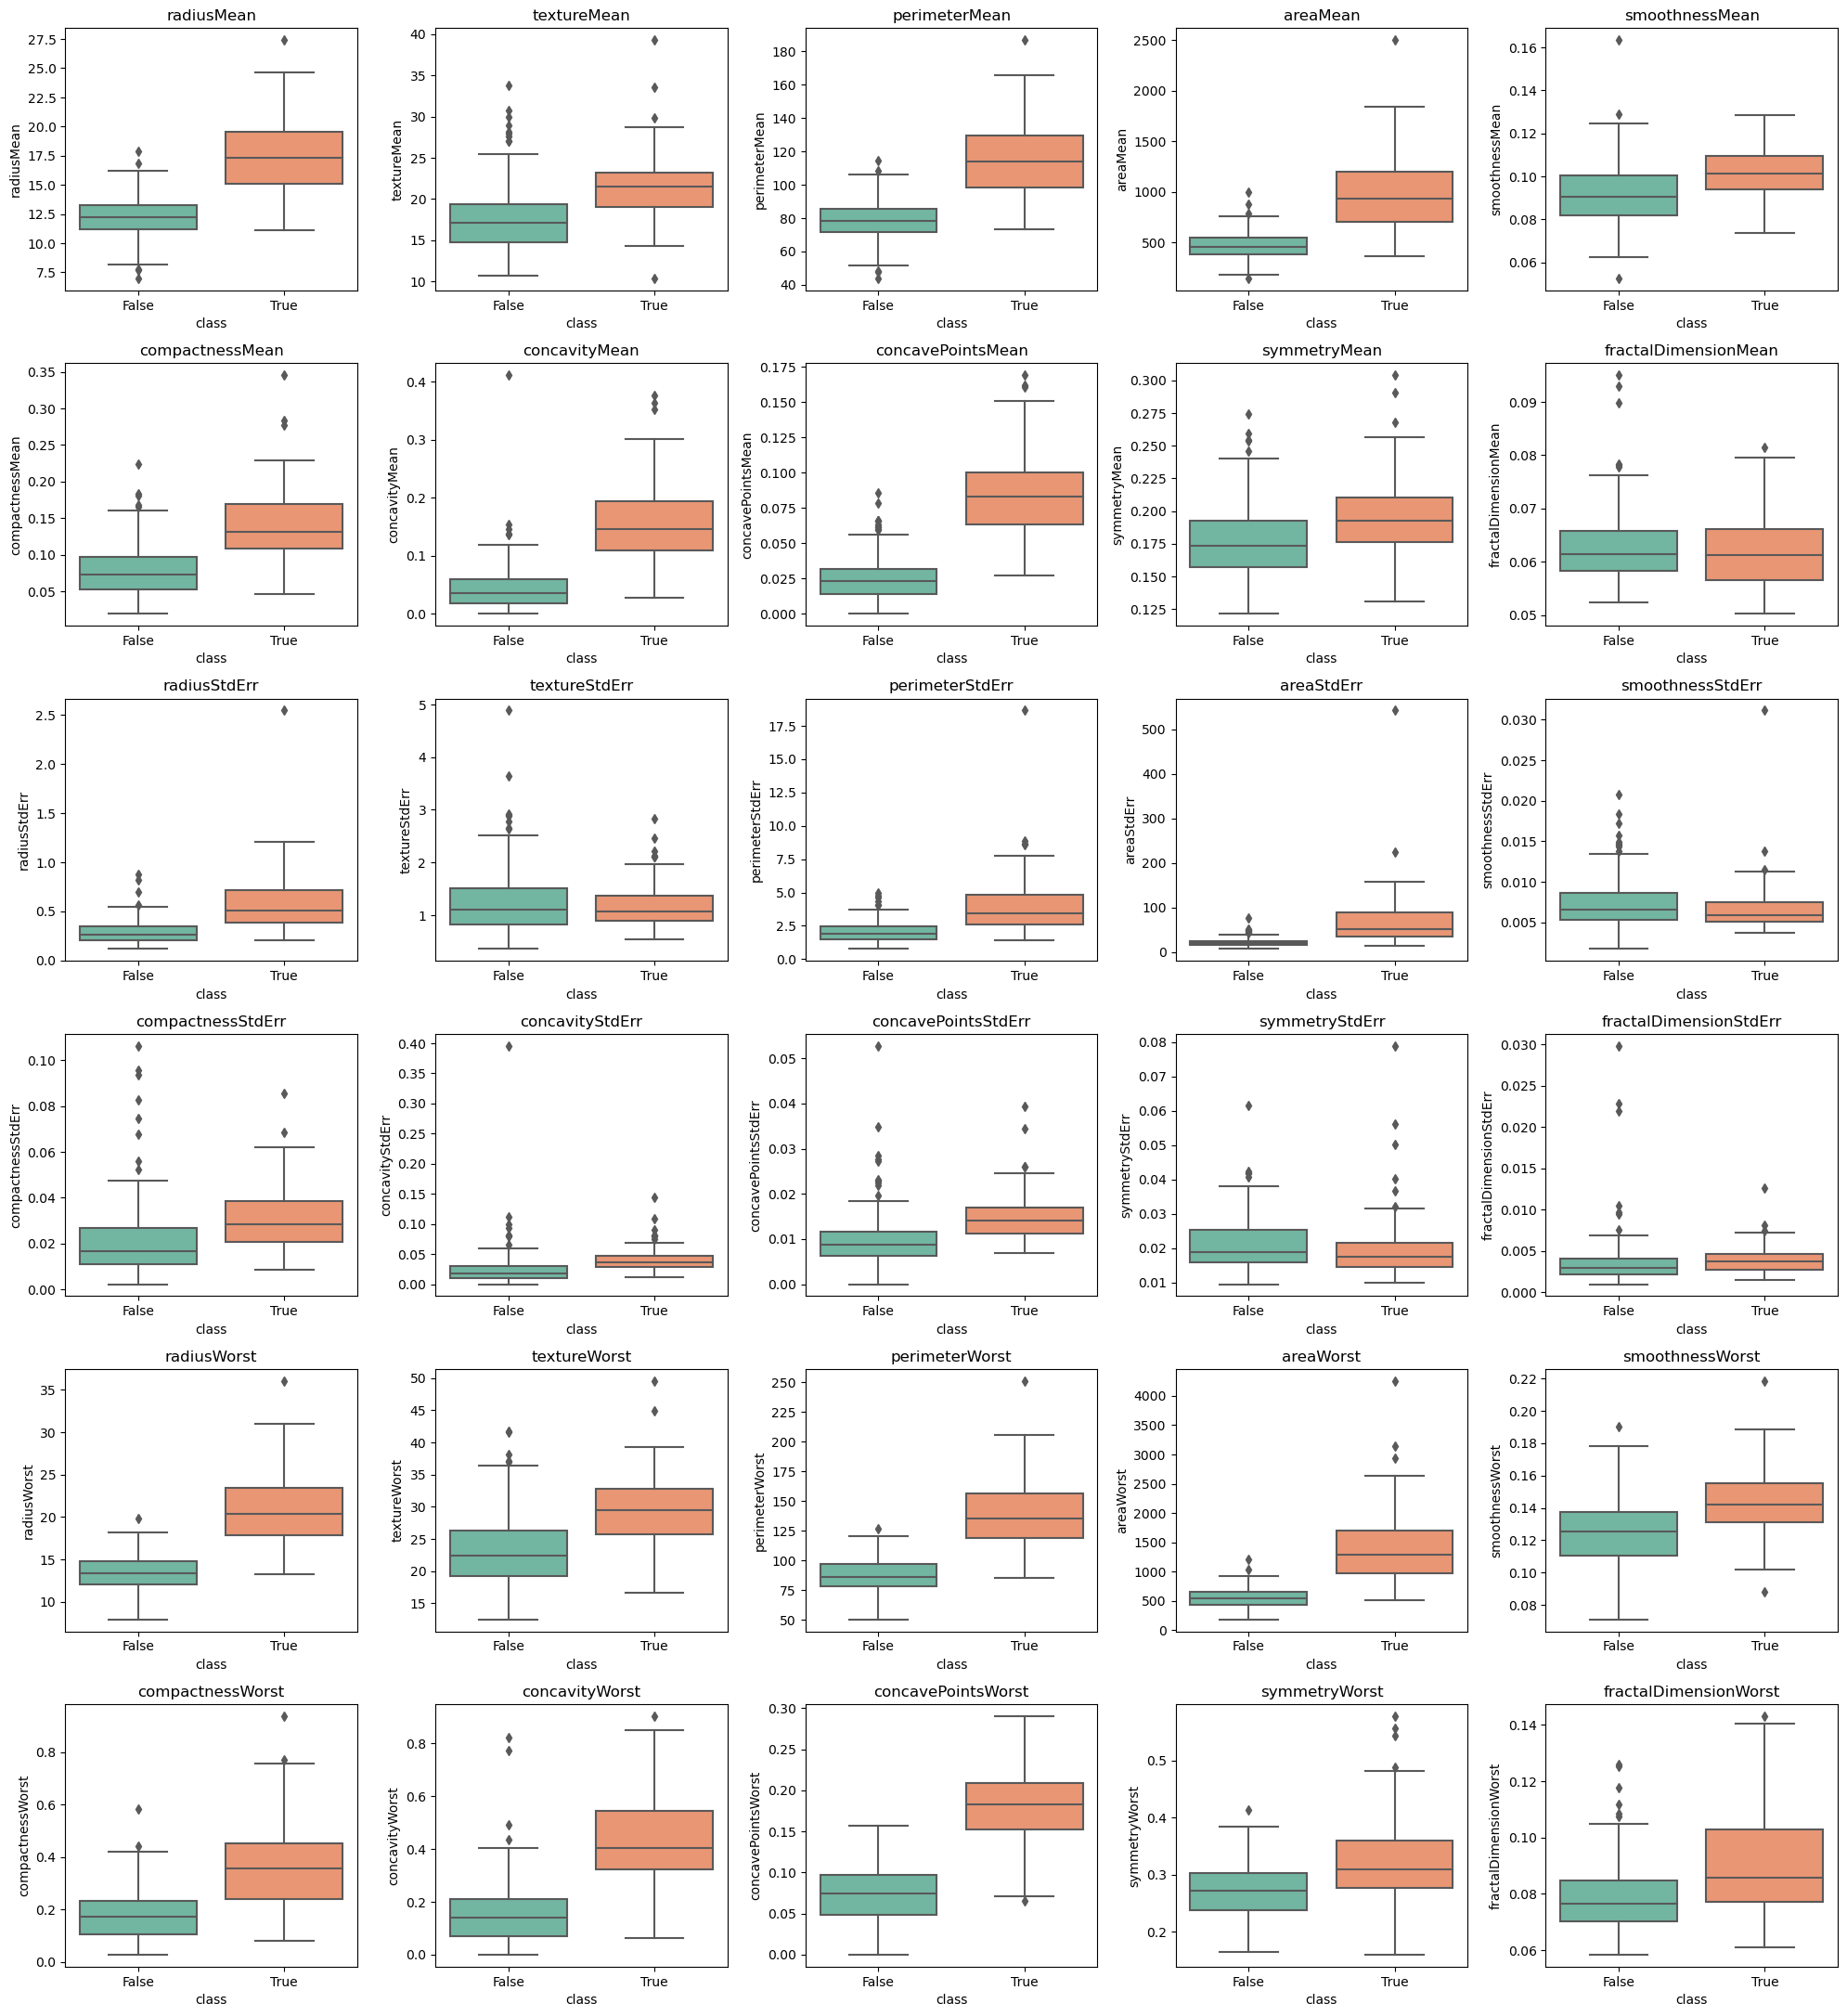

In [236]:
numeric_cols = training_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'class' in numeric_cols:
    numeric_cols.remove('class')
    
plt.figure(figsize=(20, 25))
for i, col in enumerate(training_df[numeric_cols]):
    plt.subplot(7, 5, i+1)
    sns.boxplot(x='class', y=training_df[col], data=training_df, palette='Set2')
    plt.title(col)
plt.tight_layout()
plt.show()

### Correlation Matrix

Compute correlation matrix and display as a heatmap.

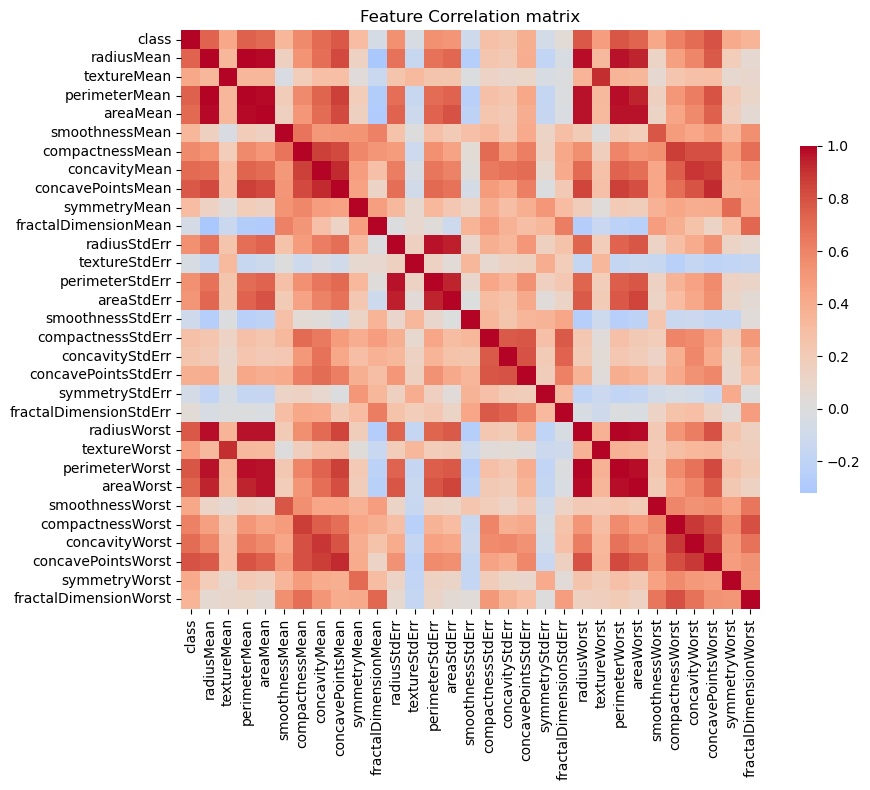

radiusMean      perimeterMean      0.997917
radiusWorst     perimeterWorst     0.994108
radiusMean      areaMean           0.986544
perimeterMean   areaMean           0.985754
radiusWorst     areaWorst          0.982171
perimeterWorst  areaWorst          0.976889
perimeterMean   perimeterWorst     0.974502
radiusMean      radiusWorst        0.974413
perimeterMean   radiusWorst        0.974166
radiusStdErr    perimeterStdErr    0.972245
areaMean        radiusWorst        0.971577
radiusMean      perimeterWorst     0.969640
areaMean        areaWorst          0.968140
                perimeterWorst     0.967910
radiusStdErr    areaStdErr         0.944433
dtype: float64

In [237]:
corr = training_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, cbar_kws={'shrink': 0.6})
plt.title('Feature Correlation matrix')
plt.tight_layout()
plt.show()

corr_abs = corr.abs()
np.fill_diagonal(corr_abs.values, 0)
high_corr = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
             .stack().sort_values(ascending=False))
display(high_corr.head(15))

### Feature Engineering

In [238]:
def add_engineered_features(df):
    df = df.copy()
    
    # basic ratios
    df['area_perimeter_ratio'] = df['areaMean'] / (df['perimeterMean'] + 1e-5)
    df['concavity_concavePoints_ratio'] = df['concavityMean'] / (df['concavePointsMean'] + 1e-5)
    df['texture_smoothness_ratio'] = df['textureMean'] / (df['smoothnessMean'] + 1e-5)
    df['perimeter_radius_ratio'] = df['perimeterMean'] / (df['radiusMean'] + 1e-5)
    df['smoothness_compactness_ratio'] = df['smoothnessMean'] / (df['compactnessMean'] + 1e-5)
    
    # mean-to-worst ratios and differences
    features = ["radius", "texture", "perimeter", "area", "smoothness",
                "compactness", "concavity", "concavePoints", "symmetry", "fractalDimension"]
    
    for f in features:
        df[f'{f}_worst_to_mean'] = df[f'{f}Worst'] / (df[f'{f}Mean'] + 1e-5)
        df[f'{f}_mean_to_std'] = df[f'{f}Mean'] / (df[f'{f}StdErr'] + 1e-5)
        df[f'{f}_worst_minus_mean'] = df[f'{f}Worst'] - df[f'{f}Mean']
    
    # shape / geometry features
    df['circularity_index'] = (4 * np.pi * df['areaMean']) / ((df['perimeterMean'] ** 2) + 1e-5)
    df['roughness_index'] = (df['perimeterWorst'] / (df['perimeterMean'] + 1e-5)) - 1
    df['area_variability_index'] = (df['areaWorst'] - df['areaMean']) / (df['areaStdErr'] + 1e-5)
    
    # composite feature groups
    df['size_index'] = df[['radiusMean', 'perimeterMean', 'areaMean']].mean(axis=1)
    df['structure_index'] = df[['smoothnessMean', 'compactnessMean', 'concavityMean', 'concavePointsMean']].mean(axis=1)
    
    # optional interaction features
    df['radius_texture_interaction'] = df['radiusMean'] * df['textureMean']
    df['smoothness_compactness_interaction'] = df['smoothnessMean'] * df['compactnessMean']
    df['concavity_points_interaction'] = df['concavityMean'] * df['concavePointsMean']
    
    return df

training_df_eng = add_engineered_features(training_df)
print('Shape after feature engineering:', training_df_eng.shape)
training_df_eng.head()

Shape after feature engineering: (285, 74)


,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,fractalDimension_mean_to_std,fractalDimension_worst_minus_mean,circularity_index,roughness_index,area_variability_index,size_index,structure_index,radius_texture_interaction,smoothness_compactness_interaction,concavity_points_interaction
0,False,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.024560,0.1496,...,22.641660,0.01949,0.960491,0.169012,6.580224,214.740000,0.048623,225.8554,0.004217,0.000873
1,False,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,0.1555,...,21.881331,0.02035,0.952193,0.128881,6.509430,178.006667,0.039449,227.9340,0.004859,0.000064
2,False,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.037830,0.1714,...,18.214001,0.02188,0.911392,0.120590,4.948958,224.480000,0.074460,256.1028,0.010610,0.002037
3,True,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.074150,0.2678,...,15.868676,0.02929,0.870060,0.163818,6.460353,174.263333,0.129788,195.6440,0.018547,0.012301
4,True,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.062540,0.1720,...,23.630417,0.02445,0.901092,0.134468,8.442827,375.176667,0.096052,303.8055,0.011023,0.006817


#### Encode boolean target

If `class`is boolean-like (True/False), convert it to integer 0/1.

In [239]:
if 'class' in training_df_eng.columns:
    if training_df_eng['class'].dtype == 'bool':
        training_df_eng['class'] = training_df_eng['class'].astype(int)
        print("Converted boolean target to integers. Unique values:", training_df_eng['class'].unique())
    else:
        unique_vals = training_df_eng['class'].dropna().unique()
        if set(map(str, unique_vals)) <= {'True','False','true','false'}:
            training_df_eng['class'] = training_df_eng['class'].astype(str).str.lower().map({'false':0,'true':1}).astype(float).astype('Int64')
            print('Mapped textual booleans to 0/1. Unique values now:', training_df_eng['class'].unique())
        else:
            print('Target dtype:', training_df_eng['class'].dtype, 'unique values (sample):', unique_vals[:10])

Converted boolean target to integers. Unique values: [0 1]


### Removing highly correlated / redundant features

In [ ]:
def drop_highly_correlated_features(df, threshold=0.95):
    numeric = df.select_dtypes(include=[np.number]).copy()
    corr = numeric.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(columns=to_drop), to_drop


training_df_pruned, dropped_features = drop_highly_correlated_features(training_df_eng, threshold=0.95)
print('Correlation threshold: 0.95')
print('Dropped features due to high correlation:', dropped_features)
print('Shape after dropping highly correlated features:', training_df_pruned.shape)

Correlation threshold: 0.95
Dropped features due to high correlation: []
Shape after dropping highly correlated features: (285, 74)


### Split training dataset

In [ ]:
if 'class' in training_df_eng.columns:
    X = training_df_eng.drop(columns=['class'])
    y = training_df_eng['class']
else:
    X = training_df_eng.copy()
    y = None

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Training set shape:', X_train.shape)
print('Validation set shape:', X_val.shape)

Training set shape: (228, 73)
Validation set shape: (57, 73)


### Scaling / Normalization
Using `StandardScaler`. Fit on training set only.

In [242]:
scaler = StandardScaler()
scaler.fit(X_train.select_dtypes(include=[np.number]))
X_train_scaled = scaler.transform(X_train.select_dtypes(include=[np.number]))
X_val_scaled = scaler.transform(X_val.select_dtypes(include=[np.number]))

print('Scaled training set shape:', X_train_scaled.shape)
print('Scaled validation set shape:', X_val_scaled.shape)

display(X_train_scaled)

Scaled training set shape: (228, 73)
Scaled validation set shape: (57, 73)


array([[-0.52318553,  0.21818845, -0.49333007, ..., -0.25131037,
         0.44380421, -0.49201672],
       [-0.26049761, -0.81281402, -0.25357838, ..., -0.63042159,
        -0.34473402, -0.34724095],
       [-0.50906252, -0.24685947, -0.53684664, ..., -0.47095843,
        -0.73578107, -0.58275314],
       ...,
       [-0.96382332, -0.85449284, -0.98514944, ..., -0.983662  ,
        -1.05542672, -0.66687824],
       [ 2.06132461, -0.86546095,  2.04499981, ...,  0.43193432,
         0.87427273,  1.72753368],
       [ 1.61503761,  1.33254855,  1.59751808, ...,  1.96389396,
         1.03756132,  2.22084676]])

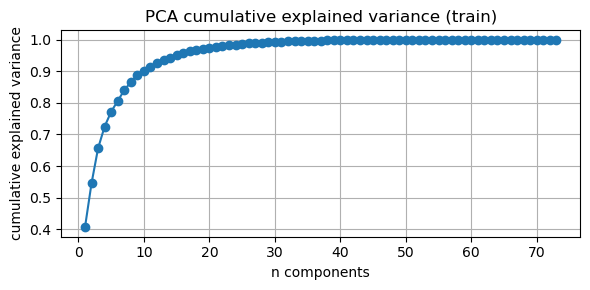

In [ ]:
# TODO

pca = PCA()
pca.fit_transform(X_train_scaled)
explained = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(6,3))
plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.xlabel('n components')
plt.ylabel('cumulative explained variance')
plt.title('PCA cumulative explained variance (train)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Sklearn Pipeline
Below is a reusable pipeline that implements imputation, winsorization, correlation filtering, and scaling. Fit this pipeline on the training set only.

In [244]:
CORRELATION_THRESHOLD = 0.95
LOWER_QUANTILE = 0.01
UPPER_QUANTILE = 0.99

print('Preprocessing pipeline parameters:')
print(f' - Correlation threshold: {CORRELATION_THRESHOLD}')
print(f' - Winsorization quantiles: {LOWER_QUANTILE}, {UPPER_QUANTILE}')

Preprocessing pipeline parameters:
 - Correlation threshold: 0.95
 - Winsorization quantiles: 0.01, 0.99


In [ ]:
class DFImputer(BaseEstimator, TransformerMixin):
    """Wrap SimpleImputer but return a DataFrame with preserved column names."""
    def __init__(self, strategy='median'):
        self.strategy = strategy
        self.imputer = SimpleImputer(strategy=self.strategy)
        self.columns_ = None

    def fit(self, X, y=None):
        if isinstance(X, np.ndarray):
            raise ValueError("DataFrameImputer expects a pandas DataFrame")
        self.columns_ = X.columns.tolist()
        self.imputer.fit(X)
        return self

    def transform(self, X):
        X_t = self.imputer.transform(X)
        return pd.DataFrame(X_t, columns=self.columns_, index=X.index)


class DFWinsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, lower_q=0.01, upper_q=0.99):
        self.lower_q = lower_q
        self.upper_q = upper_q
        self.lowers_ = {}
        self.uppers_ = {}
        self.columns_ = None

    def fit(self, X, y=None):
        Xnum = X.select_dtypes(include=[np.number]).copy()
        self.columns_ = Xnum.columns.tolist()
        for c in self.columns_:
            self.lowers_[c] = Xnum[c].quantile(self.lower_q)
            self.uppers_[c] = Xnum[c].quantile(self.upper_q)
        return self

    def transform(self, X):
        X_cp = X.copy()
        for c in self.columns_:
            low = self.lowers_[c]
            up = self.uppers_[c]
            X_cp[c] = np.where(X_cp[c] < low, low, X_cp[c])
            X_cp[c] = np.where(X_cp[c] > up, up, X_cp[c])
        return X_cp


class DFCorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.95):
        self.threshold = threshold
        self.to_drop_ = []

    def fit(self, X, y=None):
        Xnum = X.select_dtypes(include=[np.number]).copy()
        corr = Xnum.corr().abs()
        upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        self.to_drop_ = [col for col in upper.columns if any(upper[col] > self.threshold)]
        return self

    def transform(self, X):
        return X.drop(columns=self.to_drop_, errors='ignore')

pipeline_df = Pipeline([
    ('impute', DFImputer(strategy='median')),
    ('winsor', DFWinsorizer(lower_q=LOWER_QUANTILE, upper_q=UPPER_QUANTILE)),
    ('corr', DFCorrelationFilter(threshold=CORRELATION_THRESHOLD)),
    ('scale', FunctionTransformer(lambda X: StandardScaler().fit_transform(X), validate=False)),
    ('pca', PCA(n_components=0.95, random_state=42))    
])

pipeline_df.fit(X_train)
X_train_pp = pipeline_df.transform(X_train)
X_val_pp = pipeline_df.transform(X_val)

print('Transformed shapes:', X_train_pp.shape, X_val_pp.shape)

# pca_step = pipeline_df.named_steps['pca']
# print("PCA n_components_:", getattr(pca_step, 'n_components_', None))
# print("Explained variance ratio (cumulative):", pca_step.explained_variance_ratio_.cumsum()[:10], "...")
# print("Total explained variance:", pca_step.explained_variance_ratio_.sum())

Transformed shapes: (228, 15) (57, 15)
PCA n_components_: 15
Explained variance ratio (cumulative): [0.33423151 0.51100301 0.60686296 0.68609058 0.74917603 0.7972897
 0.83418623 0.86675733 0.88926382 0.90513159] ...
Total explained variance: 0.9552221623840705


## Model Training and Evaluation

Now that preprocessing is complete, we train a few baseline classifiers:
- Logistic Regression (interpretable linear model)
- Random Forest (nonlinear, robust)
- Gradient Boosting (if desired)
We then compare performance on validation data using multiple metrics.


// TODO

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
import seaborn as sns

X_train_pp, X_val_pp = X_train_pp, X_val_pp
y_train, y_val = y_train, y_val

# Define classifiers TODO
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_pp, y_train)
    preds = model.predict(X_val_pp)
    probs = model.predict_proba(X_val_pp)[:, 1] if hasattr(model, "predict_proba") else preds
    
    acc = accuracy_score(y_val, preds)
    prec = precision_score(y_val, preds)
    rec = recall_score(y_val, preds)
    f1 = f1_score(y_val, preds)
    auc = roc_auc_score(y_val, probs)
    
    results.append({
        "Model": name, "Accuracy": acc, "Precision": prec,
        "Recall": rec, "F1": f1, "ROC-AUC": auc
    })
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}, AUC: {auc:.3f}")

# Show results table
results_df = pd.DataFrame(results)
display(results_df)



Logistic Regression Results:
Accuracy: 0.965, Precision: 1.000, Recall: 0.909, F1: 0.952, AUC: 0.979

Random Forest Results:
Accuracy: 0.895, Precision: 0.864, Recall: 0.864, F1: 0.864, AUC: 0.963


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.964912,1.000000,0.909091,0.952381,0.979221
1,Random Forest,0.894737,0.863636,0.863636,0.863636,0.962987


Best model: Logistic Regression


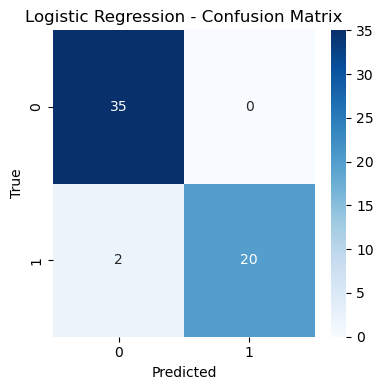

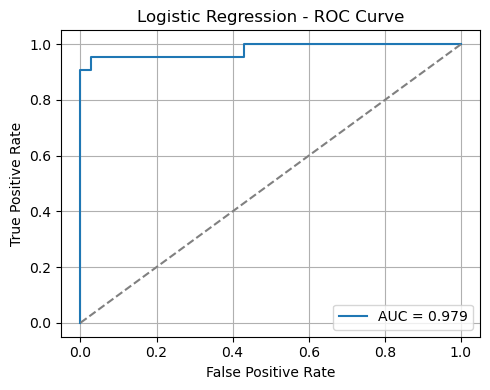

In [247]:
from sklearn.metrics import ConfusionMatrixDisplay

# Choose best model (by ROC-AUC)
best_model_name = results_df.sort_values("ROC-AUC", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]
print(f"Best model: {best_model_name}")

# Confusion matrix
preds = best_model.predict(X_val_pp)
cm = confusion_matrix(y_val, preds)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"{best_model_name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# ROC curve
probs = best_model.predict_proba(X_val_pp)[:, 1]
fpr, tpr, _ = roc_curve(y_val, probs)
auc = roc_auc_score(y_val, probs)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.title(f"{best_model_name} - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
